In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Data/Psychedelic_mushroom_DATA.csv')

In [3]:
df.head(5)

,CASEID_7139,COHORTS,PYS_USE_VENN,PSY_USE_YN,PM_USE_YN,PM_USE_ONLY_YN,PM_VS_PSY_YN,SEX,AGE,ETHNICITY,...,PSY2_UNDIAG_CONCERN,PSY2_NO_KNOWLEDGE,PM1_GEN_HEALTH,PM1_DIAG_CONDITION,PM1_UNDIAG_CONCERN,PM2_FREQ_COVID,PM3_FREQ_POLITICS,PM4_CARE,INSURANCE,DATA_WEIGHT
0,1,1.0,1.0,1.0,1.0,1.0,2.0,0,19.0,3.0,...,0,0,1,0,0,2,3,0,0,57772.54
1,2,1.0,1.0,1.0,1.0,1.0,2.0,0,21.0,2.0,...,1,0,1,0,0,3,3,0,1,25738.42
2,3,1.0,1.0,1.0,1.0,1.0,2.0,0,22.0,2.0,...,1,0,0,0,0,3,4,0,0,42172.56
3,4,1.0,1.0,1.0,1.0,1.0,2.0,0,22.0,2.0,...,0,0,1,0,0,3,3,0,1,28356.81
4,5,1.0,1.0,1.0,1.0,1.0,2.0,0,23.0,2.0,...,1,0,1,0,0,3,3,0,1,25738.42


## Baseline Model

In [4]:
# For the baseline model, the predictive variables are: 
# demographic and socioecomomic status, and knowledge of psychedelic compounds.

X1 = df[['SEX', 'AGE', 'ETHNICITY', 'HLS_YN', 'REGION', 'INSURANCE', 'PM2_FREQ_COVID','PM3_FREQ_POLITICS',
        'PSY1_POSITIVE_USE', 'PSY2_GEN_HEALTH', 'PSY2_DIAG_CONDITION', 'PSY2_UNDIAG_CONCERN', 'PSY2_NO_KNOWLEDGE']]
X1.head(5)

,SEX,AGE,ETHNICITY,HLS_YN,REGION,INSURANCE,PM2_FREQ_COVID,PM3_FREQ_POLITICS,PSY1_POSITIVE_USE,PSY2_GEN_HEALTH,PSY2_DIAG_CONDITION,PSY2_UNDIAG_CONCERN,PSY2_NO_KNOWLEDGE
0,0,19.0,3.0,1.0,4.0,0,2,3,3,1,0,0,0
1,0,21.0,2.0,0.0,2.0,1,3,3,1,0,0,1,0
2,0,22.0,2.0,0.0,4.0,0,3,4,3,1,1,1,0
3,0,22.0,2.0,0.0,3.0,1,3,3,2,1,1,0,0
4,0,23.0,2.0,0.0,2.0,1,3,3,2,1,1,1,0


In [5]:
df['label'] = df['COHORTS'].replace(-99, 1)
y = df['label']

In [6]:
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

In [7]:
model1 = LogisticRegression(solver='liblinear', random_state=42)
model1.fit(X1_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [8]:
print('classes:', model1.classes_)
print('intercept:', model1.intercept_)
print('coef:', model1.coef_)

classes: [0. 1.]
intercept: [5.41795779]
coef: [[ 0.74960149 -0.03054546 -0.02509807  0.07092273  0.15426709  0.16078642
  -0.13584191  0.19368025 -0.68755775 -0.11636795 -0.18271447  0.33259463
  -1.31032637]]


In [9]:
print('predicted probability:', model1.predict_proba(X1_test))
print('predicted value:', model1.predict(X1_test))

predicted probability: [[0.99613625 0.00386375]
 [0.9780162  0.0219838 ]
 [0.99542523 0.00457477]
 ...
 [0.93360591 0.06639409]
 [0.99796111 0.00203889]
 [0.94124465 0.05875535]]
predicted value: [0. 0. 0. ... 0. 0. 0.]


In [10]:
model1.score(X1_test, y_test)

0.9684873949579832

In [11]:
confusion_matrix(y_test, model1.predict(X1_test))

array([[1327,    0],
       [  45,   56]])

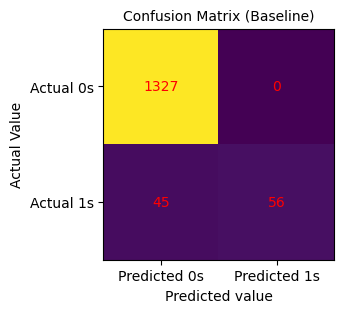

In [12]:
cm = confusion_matrix(y_test, model1.predict(X1_test))

fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.xlabel("Predicted value")
plt.ylabel("Actual Value")
plt.title("Confusion Matrix (Baseline)", fontsize=10)
plt.show()

In [13]:
print(classification_report(y_test, model1.predict(X1_test)))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      1327
         1.0       1.00      0.55      0.71       101

    accuracy                           0.97      1428
   macro avg       0.98      0.78      0.85      1428
weighted avg       0.97      0.97      0.96      1428



## Boosted Model

In [14]:
# For the boosted model, the predictive variables are: 
# demographic and socioecomomic status, knowledge of psychedelic compounds, and health conditions.

X2 = df[['SEX', 'AGE', 'ETHNICITY', 'HLS_YN', 'REGION', 'INSURANCE', 'PM2_FREQ_COVID','PM3_FREQ_POLITICS',
        'PSY1_POSITIVE_USE', 'PSY2_GEN_HEALTH', 'PSY2_DIAG_CONDITION', 'PSY2_UNDIAG_CONCERN', 'PSY2_NO_KNOWLEDGE',
        'BMI', 'C_TOTAL', 'C_DP', 'C_ANX', 'C_PN', 'C_ALL', 'C_MI', 'C_INSOM', 'C_HYP', 'C_DH', 'C_SA', 'C_GERD', 'C_CS', 'C_LIP', 
        'CCI_SCORE', 'GAD7_SCORE', 'PHQ9_SCORE', 'GAD7_GE10', 'PHQ9_GE10', 'PCS12', 'MCS12', 'VR6D']]
X2.head(5)

,SEX,AGE,ETHNICITY,HLS_YN,REGION,INSURANCE,PM2_FREQ_COVID,PM3_FREQ_POLITICS,PSY1_POSITIVE_USE,PSY2_GEN_HEALTH,...,C_CS,C_LIP,CCI_SCORE,GAD7_SCORE,PHQ9_SCORE,GAD7_GE10,PHQ9_GE10,PCS12,MCS12,VR6D
0,0,19.0,3.0,1.0,4.0,0,2,3,3,1,...,0.0,0.0,0.0,3.0,8.0,0.0,0.0,48.99,37.90,0.67
1,0,21.0,2.0,0.0,2.0,1,3,3,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.21,57.93,0.86
2,0,22.0,2.0,0.0,4.0,0,3,4,3,1,...,0.0,0.0,0.0,21.0,17.0,1.0,1.0,33.83,25.91,0.47
3,0,22.0,2.0,0.0,3.0,1,3,3,2,1,...,0.0,0.0,0.0,5.0,15.0,0.0,1.0,61.63,25.13,0.67
4,0,23.0,2.0,0.0,2.0,1,3,3,2,1,...,0.0,0.0,0.0,13.0,15.0,1.0,1.0,38.54,45.53,0.64


In [15]:
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)

In [16]:
model2 = LogisticRegression(solver='liblinear', random_state=42)
model2.fit(X2_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [17]:
print('classes:', model2.classes_)
print('intercept:', model2.intercept_)
print('coef:', model2.coef_)

classes: [0. 1.]
intercept: [5.12967545]
coef: [[ 0.75558949 -0.02847401 -0.02841443  0.10460261  0.15947173  0.24229272
  -0.08724767  0.14729656 -0.62809782 -0.12164253 -0.18811092  0.32666733
  -1.24728555 -0.01033248 -0.00613639 -0.01224998 -0.08124321  0.08083122
   0.12290868  0.08419783 -0.61244213  0.2533631   0.11625592  0.37364453
  -0.26836617 -0.2244746  -0.29520134  0.05510258  0.03656635  0.02379485
   0.06291424  0.23496769 -0.00489685  0.00654279 -0.34219576]]


In [18]:
print('predicted probability:', model2.predict_proba(X2_test))
print('predicted value:', model2.predict(X2_test))

predicted probability: [[0.99699314 0.00300686]
 [0.95752053 0.04247947]
 [0.99827073 0.00172927]
 ...
 [0.95815126 0.04184874]
 [0.99843842 0.00156158]
 [0.93004252 0.06995748]]
predicted value: [0. 0. 0. ... 0. 0. 0.]


In [19]:
model2.score(X2_test, y_test)

0.969187675070028

In [20]:
confusion_matrix(y_test, model2.predict(X2_test))

array([[1326,    1],
       [  43,   58]])

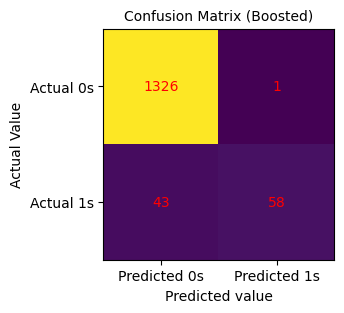

In [21]:
cm = confusion_matrix(y_test, model2.predict(X2_test))

fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.xlabel("Predicted value")
plt.ylabel("Actual Value")
plt.title("Confusion Matrix (Boosted)", fontsize=10)
plt.show()

In [22]:
print(classification_report(y_test, model2.predict(X2_test)))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      1327
         1.0       0.98      0.57      0.72       101

    accuracy                           0.97      1428
   macro avg       0.98      0.79      0.85      1428
weighted avg       0.97      0.97      0.97      1428

